In [1]:
import numpy as np
from sympy import *
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Lab 3: Numerical and graphical techniques

In this lab we'll explore how to code up the three numerical and graphical techniques we discussed this week (Chapter 4 of the text). The lectures covered some of the simpler models. Here we'll review those and then explore some of the more complex models.

## 1. Plotting variables as a function of time (simulations)

The first technique we saw was simply just plotting our variables over time.

We covered this with the **logistic growth** model already in last week's lab (and in this week's lectures):

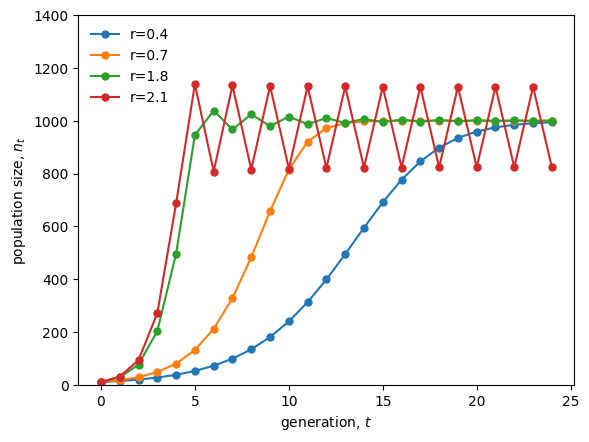

In [192]:
# recursive function (generator) for logistic growth in discrete time
def n(n0, r, k, max=np.inf):
    t, nt = 0, n0 #initial conditions
    while t < max:
        yield nt #current state
        t += 1 #update t (add one to current value)
        nt += r * nt * (1 - nt / k) #update n_t (note we're just adding the change in n on to the previous value of nt with '+=')

# plotting this for some parameter values
rs = [0.4, 0.7, 1.8, 2.1] #choose some intrinsic growth rates, r
colors = sns.color_palette('tab10', len(rs)) #and some fun colors

fig, ax = plt.subplots()
for i,r in enumerate(rs): #loop over the r values
    nt = n(n0=10, r=r, k=1000, max=25) #input the parameter values into our generator
    nts = [n for n in nt] #get population sizes, n_t, from generator
    ax.plot(range(25), nts, color=colors[i], label="r=%.1f" %r, marker='.', markersize=10) #plot (note we join the dots for a clearer visual despite this being discrete time)

ax.set_ylim(ymin=0, ymax=1400)
ax.set_xlabel("generation, $t$")
ax.set_ylabel("population size, $n_t$")
ax.legend(frameon=False) #make a legend so we know which curve is which
plt.show() #and show the plot with some axes labels

Let's try this now for a model with **two** variables, the **Lotka-Volterra competition** model with two species

$n_1(t+1) = n_1(t) \left(1 + r_1 \left(1 - \frac{n_1(t) + \alpha_{12}n_2(t)}{K_1}\right)\right)$

$n_2(t+1) = n_2(t) \left(1 + r_2 \left(1 - \frac{n_2(t) + \alpha_{21}n_1(t)}{K_2}\right)\right)$

**Q1.** [1 point] Write a function that creates a generator for $n_1$ and $n_2$.

**Q2.** [1 point] Use the generator to calculate $n_1$ and $n_2$ and plot them together in the same figure. Use $n_1(0)=n_2(0)=10$, $r_1=r_2=1$, $K_1=K_2=1000$, $\alpha_{12}=0.5$, and $\alpha_{21}=0.75$ and plot from $t=0$ to $t=25$.

**Q3.** [1 point] Why does species 1 have a larger population size than species 2 at $t=25$? 

## 2. Plotting variables as functions of themselves (cobwebs)

In lecture 5 we plotted the allele frequency in the next generation as a function of the allele frequency in the current generation for our model of **diploid selection**

$p_{t+1} = \frac{W_{AA} p_t^2 + W_{Aa} p_t q_t}{W_{AA} p_t^2 + W_{Aa} 2 p_t q_t + W_{aa} q_t^2}$

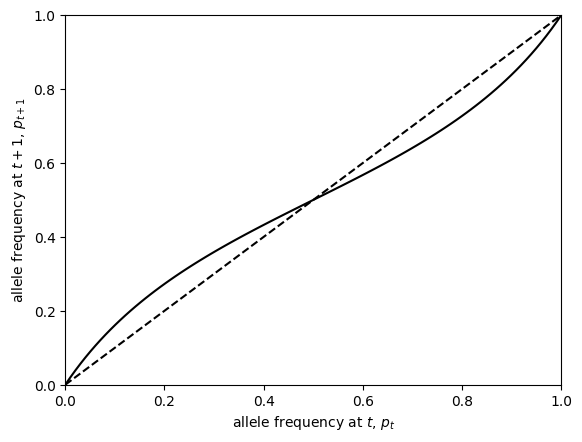

In [196]:
WAA, WAa, Waa = 1, 2, 1 #choose parameter values
pt = symbols('pt') #define our variable p(t)

# Write out sympy equation
f = (WAA * pt**2 + WAa * pt * (1- pt) ) / (WAA * pt**2 + WAa * 2 * pt * (1 - pt) + Waa * (1 - pt)**2) #the recursion equation

# Compute function over a set of points in [0,1] by 'lambdifying' sympy equation
x = np.linspace(0,1,100)
fy = lambdify(pt, f)(x) #f as a function of pt evaluated at each value of x

# Build function for generating figure
def plot_p(x,fy):
    fig, ax = plt.subplots()
    ax.plot(x, fy, color='black') #p_{t+1} as function of p_t
    ax.plot(x, x, color='black', linestyle='--') #1:1 line for reference
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel("allele frequency at $t$, $p_t$")
    ax.set_ylabel("allele frequency at $t+1$, $p_{t+1}$")
    return ax

# Plot figure
plot_p(x,fy)
plt.show()

From this we can tell when the allele frequency is increasing (solid curve above the dashed curve, ie, $p_{t+1}>p_t$) or decreasing (solid curve below the dashed curve, ie, $p_{t+1}<p_t$).

We also added the dynamics from a given initial condition visually, using cob-webbing

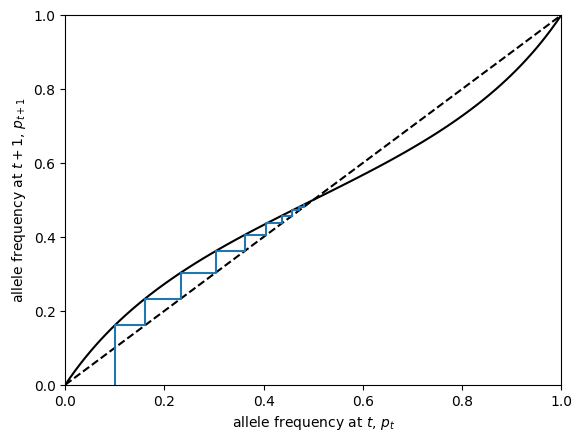

In [197]:
def pt(p0, WAA, WAa, Waa, max=oo):
    t, pnow, pnext = 0, p0, 0 #initial conditions
    while t < max:
        yield pnow, pnext #current value of p(t) and p(t+1)
        pnext = (WAA * pnow**2 + WAa * pnow * (1 - pnow)) / (WAA * pnow**2 + WAa * 2 * pnow * (1 - pnow) + Waa * (1 - pnow)**2) #update p(t+1)
        yield pnow, pnext #current value of p(t) and p(t+1)
        pnow = pnext #update p(t)
        t += 1 #update t

# Initialize generator
pts = pt(p0=0.1, WAA=WAA, WAa=WAa, Waa=Waa, max=10)

# Compute x,y pairs by iterating through generator
ps = np.array([[x,y] for x,y in pts])

# Plot figure with 'cobwebs'
ax = plot_p(x,fy)
ax.plot(ps[:,0], ps[:,1])
plt.show()

Now let's do this for the model of **logistic growth**

$n_{t+1} = n_t \left(1 + r \left(1 - \frac{n_t}{K}\right)\right)$

**Q4.** [1 point] Plot $n_{t+1}$ as a function of $n_t$ for $r=0.5$ and $K=1000$, and include a diagonal line for reference. Make the axes extend from 0 to $2K$. Add cob-webbing from initial condition $n_0=100$, for 10 iterations.

**Q5** [1 point] Now make the same plot for $r=2$ and $r=2.7$.

**Q6.** [1 point] What is the key difference in how the solid and dashed lines intersect at ($K$,$K$) for $r=0.5$ vs $r\geq2$? [Hint: See Section 4.3.2 and Box 4.2 in the text for more info.]

## 3. Phase planes, vector fields, and null clines

The previous technique is "easier" than simulating (the first technique) because all we have to do to understand the dynamics is plot the recursion itself rather than iterating it over time (although we did iterate to make the actual cob-web, we don't need to do that to understand the dynamics once we remember that we go to the left when the recursion is below the 1:1 line and to the right when the recursion is above the 1:1 line). 

However, cob-webbing is limited to models with a single variable (eg, allele frequency or population size).

For models of **two** variables we can make a third type of visual aid, a **phase plane**.

In Lecture 6 we saw an example of this for the **Lotka-Volterra competition** model

$$
n_1(t+1) = n_1(t)\left( 1 + r_1 \left(1 - \frac{n_1(t) + \alpha_{12}n_2(t)}{K_1}\right)\right)
$$

$$
n_2(t+1) = n_2(t) \left(1 + r_2 \left(1 - \frac{n_2(t) + \alpha_{21}n_1(t)}{K_2}\right)\right)
$$

We first plot the change in our variables ($\Delta n_1$, $\Delta n_2$) from many different starting points ($n_1$, $n_2$) as vectors. This is called a **vector field**.

In [160]:
# This is our vector field plotting function -- don't worry too much about the details of this, just re-use it below
def plot_vector_field(dn1, dn2, xlim=(0,1200), ylim=(0,1200), n_steps=25, width=8, height=6, show=False, axes_labels=[None, None]):
    # Set x and y ranges 
    xrange, yrange = np.linspace(xlim[0], xlim[1], n_steps), np.linspace(ylim[0], ylim[1], n_steps)

    # Initialize 2D grid with x,y values and additional grids to track derivatives
    X, Y = np.meshgrid(xrange, yrange)
    U, V = np.zeros(X.shape), np.zeros(Y.shape)

    # Compute the gradient at each x,y position
    for i in range(len(xrange)):
        for j in range(len(xrange)):
            U[i,j] = lambdify((n1, n2), dn1)(X[i,j], Y[i,j]) #change in n1
            V[i,j] = lambdify((n1, n2), dn2)(X[i,j], Y[i,j]) #change in n2

    # Plot figure
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.set_xlabel(axes_labels[0])
    ax.set_ylabel(axes_labels[1])
    ax.quiver(X,Y,U,V, linewidth=1) #plot arrow from X,Y that moves U in x and V in y 

    if show == True:
        plt.show()
    else:
        return ax

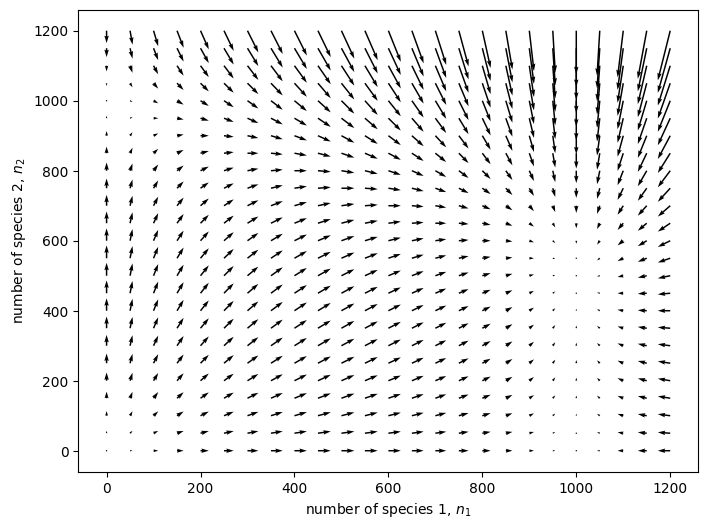

In [161]:
# Now lets plot our vector field
n1, n2 = var('n1, n2') #our variables

#choose parameter values
r1, r2 = 0.5, 0.5
k1, k2 = 1000, 1000
a12, a21 = 0, 0.5

#our difference equations
dn1 = r1 * n1 * (1 - (n1 + a12 * n2) / k1)
dn2 = r2 * n2 * (1 - (n2 + a21 * n1) / k2)

# plot the vector field
plot_vector_field(dn1, dn2, axes_labels=["number of species 1, $n_1$", "number of species 2, $n_2$"])
plt.show()

This shows how the variables will change through time, by following the arrows. 

We then added the **null clines**, which show where either $n_1$ or $n_2$ is constant (ie, where $\Delta n_1=0$ or $\Delta n_2=0$) 

In [172]:
# function to find and plot nullclines -- dont worry too much about the details, just re-use it below
def plot_nullclines(ax, dn1, dn2, xrange = np.linspace(0, 1200, 100),  yrange = np.linspace(0, 1200, 100)):

    #plot the null clines for species 1 (blue)
    nullcline_1 = [i for i in solve(Eq(dn1, 0), n1)] #where is the change in n1 zero 
    for nullcline in nullcline_1:
        ax.plot([nullcline.subs(n2,y) for y in yrange], yrange, color='b') #the values of n1 that make dn1=0 for each value of n2
    # sometimes we need to solve for n2 instead
    nullcline_1 = [i for i in solve(Eq(dn1, 0), n2)] #where is the change in n1 zero 
    for nullcline in nullcline_1:
        ax.plot(xrange, [nullcline.subs(n1,x) for x in xrange], color='b') #the values of n2 that make dn1=0 for each value of n1
        
    # #plot the null clines for species 2 (red)
    nullcline_2 = [i for i in solve(Eq(dn2, 0), n2)] #where is the change in n2 zero
    for nullcline in nullcline_2:
        ax.plot(xrange, [nullcline.subs(n1,x) for x in xrange], color='r') #the values of n2 that make dn2=0 for each value of n1
    # sometimes we need to solve for n1 instead
    nullcline_2 = [i for i in solve(Eq(dn2, 0), n1)] #where is the change in n1 zero 
    for nullcline in nullcline_2:
        ax.plot([nullcline.subs(n2,y) for y in yrange], yrange, color='r') #the values of n2 that make dn1=0 for each value of n1
        
    return ax

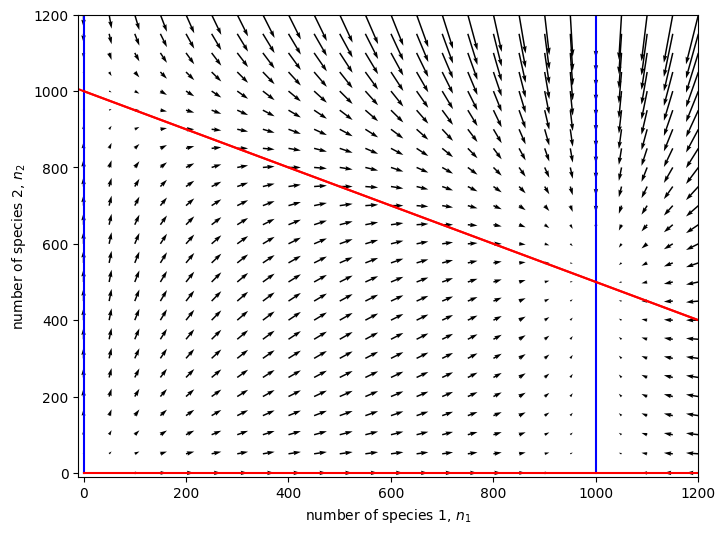

In [173]:
# plot vector field
ax = plot_vector_field(dn1, dn2, axes_labels=["number of species 1, $n_1$", "number of species 2, $n_2$"])

# plot null clines
plot_nullclines(ax, dn1, dn2)

plt.xlim(-10,1200)
plt.ylim(-10,1200)

plt.show()

The equilibria are the places where these curves meet (ie, where both $n_1$ and $n_2$ are constant, $\Delta n_1=0$ and $\Delta n_2=0$)

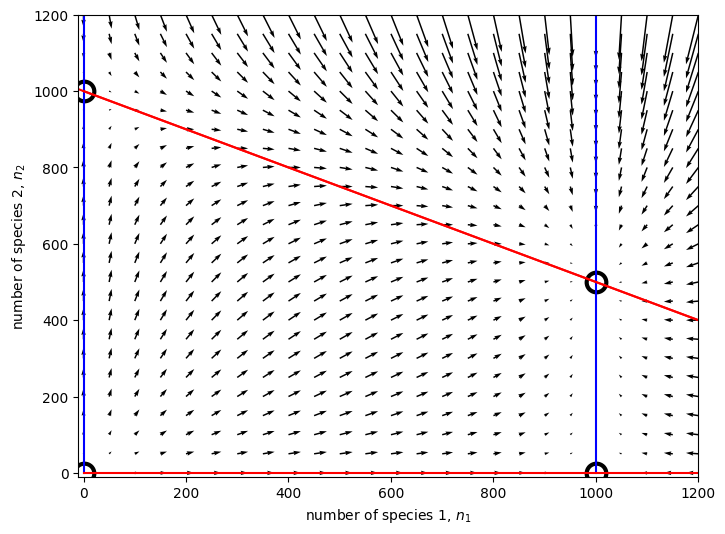

In [176]:
#find and plot the equilibria
ax = plot_vector_field(dn1, dn2, axes_labels=["number of species 1, $n_1$", "number of species 2, $n_2$"])
ax = plot_nullclines(ax, dn1, dn2)

eqs = solve([Eq(dn1, 0), Eq(dn2, 0)], [n1, n2]) # solve for equilibria
for i in list(eqs):
    ax.scatter(i[0], i[1], s=200, color='r', linewidth=3, edgecolor='black', facecolor='white')

plt.xlim(-10,1200)
plt.ylim(-10,1200)

plt.show()

The null clines are where the change in a variable is zero, which means they also show where the change in a variable switches between positive and negative. This means that in a region delimited by null clines the dynamics always point in the qualitatively same direction (eg, here all the vectors in the bottom left region point up and to the right). We now have a pretty good sense of the models dynamics knowing just a single vector in each region.

Alright, now let's do this for a model we haven't seen yet, of a predator and prey (or "consumer" and "resource" to be more general; see Section 3.4.2 of the text for more info). This time we'll work in continuous-time, but the workflow is exactly the same, now we just use the differential equations, rather than the difference equations, to make the vector field.

The model we'll look at is called the **Lotka-Volterra predator-prey** model. We assume the number of prey, $n_1$ increases exponentially at rate $r$ in the absence of predators. We assume that predators and prey meet each other at rate $c n_1 n_2$, where $n_2$ is the number of predators and $c$ is a contact rate. We'll then assume that, on contact, a predator consumes prey with probability $a$ and that a fraction $\epsilon$ of consumed prey are converted into new predators. Finally, we assume that predators die at a constant rate, $\delta$. We then have

$$\frac{\mathrm{d}n_1}{\mathrm{d}t} = r n_1(t) - a c n_1(t) n_2(t)$$

$$\frac{\mathrm{d}n_2}{\mathrm{d}t} = \epsilon a c n_1(t) n_2(t) - \delta n_2(t)$$

**Q7.** [1 point ] Plot a phase-plane and vector field for this model with $r=0.5$, $a = 1$, $c=0.01$, $\epsilon=0.2$, $\delta=0.1$. Restrict both axes to be between 0 and 100.

**Q8.** [1 point] Add null clines to this plot.

**Q9.** [1 point] How would you describe the dynamics that you see? [Hint: to see this  very clearly, try simulating with a generator from some initial condition. You might even like the challenge of plotting this simulation on the phase plane!]

**Q10**. [1 point] Explain why these dynamics arise, biologically.